In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import os
os.chdir('C:\\Users\\Андрей Клычев')

In [2]:
data = pd.read_csv('gold_mining_data.csv')
data

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,2014-01-01
1,1,2014-01-01,2014-02-28,565,2014-01-01
2,1,2014-01-01,2014-03-31,516,2014-01-01
3,1,2014-01-01,2014-04-30,568,2014-01-01
4,1,2014-01-01,2014-05-31,556,2014-01-01
...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,2015-01-01
13489,2674,2015-08-01,2015-08-31,573,2015-01-01
13490,2675,2015-08-01,2015-08-31,617,2015-01-01
13491,2676,2015-08-01,2015-08-31,609,2015-01-01


Для удобства перекодируем классы молотов  
0 - 2014-01-01  
1 - 2015-01-01

In [3]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
model.fit(data.hammer_date).classes_
hammers = model.transform(data.hammer_date)
data.hammer_date = hammers

Переводим даты начала работы и дату отчета в формат даты

In [4]:
data.hired_date = pd.to_datetime(data.hired_date)
data.reported_date = pd.to_datetime(data.reported_date)
data

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date
0,1,2014-01-01,2014-01-31,656,0
1,1,2014-01-01,2014-02-28,565,0
2,1,2014-01-01,2014-03-31,516,0
3,1,2014-01-01,2014-04-30,568,0
4,1,2014-01-01,2014-05-31,556,0
...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,1
13489,2674,2015-08-01,2015-08-31,573,1
13490,2675,2015-08-01,2015-08-31,617,1
13491,2676,2015-08-01,2015-08-31,609,1


In [5]:
def time(row):
    row['production'] = (row.reported_date - row.hired_date)
    return row

Преобразуем дату из формата timedelta64 в "месяцы"

In [6]:
data = data.apply(time, axis=1)
data.production = data.production/np.timedelta64(1, 'M')
data

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date,production
0,1,2014-01-01,2014-01-31,656,0,0.985647
1,1,2014-01-01,2014-02-28,565,0,1.905583
2,1,2014-01-01,2014-03-31,516,0,2.924085
3,1,2014-01-01,2014-04-30,568,0,3.909731
4,1,2014-01-01,2014-05-31,556,0,4.928233
...,...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,1,0.985647
13489,2674,2015-08-01,2015-08-31,573,1,0.985647
13490,2675,2015-08-01,2015-08-31,617,1,0.985647
13491,2676,2015-08-01,2015-08-31,609,1,0.985647


С помощью сводной таблицы группируем отдельно записи каждого гнома с учетом использования конкретного  
орудия труда, определяем среднюю производительность труда

In [7]:
pivot = pd.pivot_table(data, index=['dwarf_id', 'hammer_date'], values=['gold_mined', 'production'], aggfunc=sum)
pivot['prod_per_month'] = pivot.gold_mined / pivot.production
pivot = pivot.astype(int)
pivot

,,gold_mined,production,prod_per_month
dwarf_id,hammer_date,,,
1,0,10072,208,48
2,0,10065,208,48
3,0,9898,208,47
4,0,10050,208,48
5,0,10136,208,48
...,...,...,...,...
2673,1,695,0,705
2674,1,573,0,581
2675,1,617,0,625


### Рассмотрим хронологию отчетов отдельных рабочих

In [8]:
data

,dwarf_id,hired_date,reported_date,gold_mined,hammer_date,production
0,1,2014-01-01,2014-01-31,656,0,0.985647
1,1,2014-01-01,2014-02-28,565,0,1.905583
2,1,2014-01-01,2014-03-31,516,0,2.924085
3,1,2014-01-01,2014-04-30,568,0,3.909731
4,1,2014-01-01,2014-05-31,556,0,4.928233
...,...,...,...,...,...,...
13488,2673,2015-08-01,2015-08-31,695,1,0.985647
13489,2674,2015-08-01,2015-08-31,573,1,0.985647
13490,2675,2015-08-01,2015-08-31,617,1,0.985647
13491,2676,2015-08-01,2015-08-31,609,1,0.985647


In [9]:
first_0 = data.loc[(data.dwarf_id == 1) & (data.hammer_date == 0)]
first_1 = data.loc[(data.dwarf_id == 532) & (data.hammer_date == 1)]

In [10]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [10, 7]

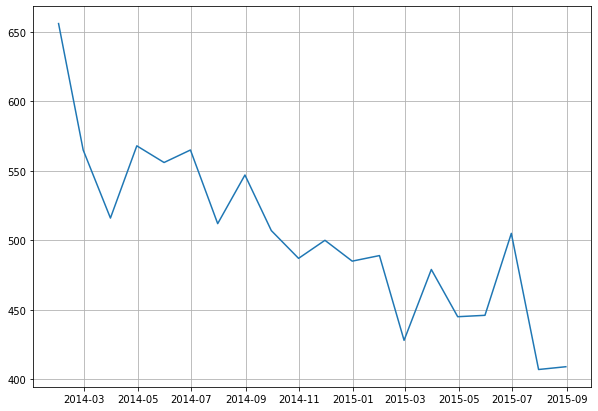

In [11]:
plt.plot(first_0.reported_date, first_0.gold_mined)
plt.grid()
plt.show()

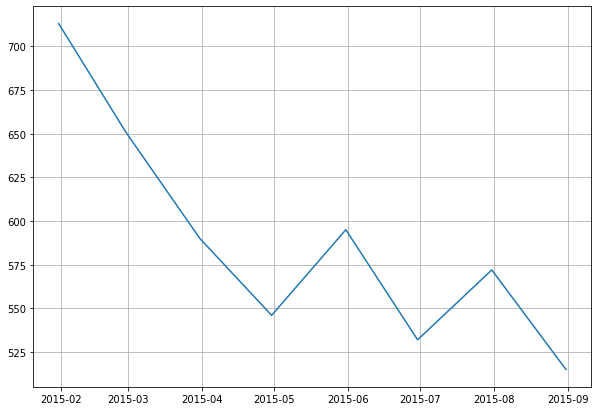

In [12]:
plt.plot(first_1.reported_date, first_1.gold_mined)
plt.grid()
plt.show()

У отдельно взятых рудокопов заметно падает выработка от отчета к отчету

In [13]:
zero_tool = data[data.hammer_date == 0]
one_tool = data[data.hammer_date == 1]

In [69]:
a = set(zero_tool.dwarf_id.unique())
len(a)

531

In [70]:
b = set(one_tool.dwarf_id.unique())
len(b)

2146

In [16]:
# Отсутствуют рабочие, имевшие практический опыт работы с обоими тиами инструмента
# Так же следует обратить внимание, что кол-во рабочих во второй год увеличилось в 4 раза !!!
a & b

set()

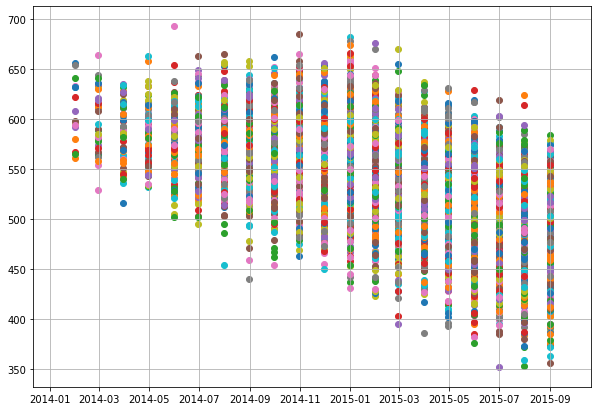

In [17]:
# Выработка рабочих, использовавших первое поколение инструмента
for i in range(1, len(a)):
    plt.scatter(data.loc[(data.dwarf_id == i) & (data.hammer_date == 0)].reported_date, \
            data.loc[(data.dwarf_id == i) & (data.hammer_date == 0)].gold_mined)
plt.grid()
plt.show()

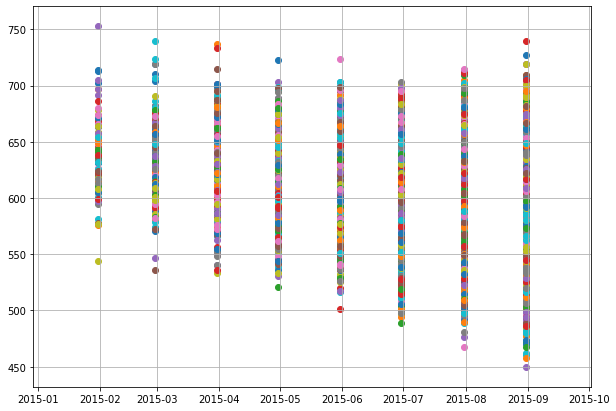

In [18]:
# Выработка рабочих, использовавших второе поколение инструмента
for i in range(532, 532+len(b)):
    plt.scatter(data.loc[(data.dwarf_id == i) & (data.hammer_date == 1)].reported_date, \
            data.loc[(data.dwarf_id == i) & (data.hammer_date == 1)].gold_mined)
plt.grid()
plt.show()

Тендеция на уменьшение выработки наблюдается в обоих случаях, хотя во втором случае заметно больше дисперсия

In [27]:
uniques_0 = zero_tool.hired_date.unique()
stdevs_0 = []
means_0 = []
mins_0 = []
maxes_0 = []
for _ in range(len(uniques_0)):
    std_0 = zero_tool[zero_tool.hired_date == uniques_0[_]].describe().reset_index().iloc[2][2]
    mn_0 = zero_tool[zero_tool.hired_date == uniques_0[_]].describe().reset_index().iloc[1][2]
    mi_0 = zero_tool[zero_tool.hired_date == uniques_0[_]].describe().reset_index().iloc[3][2]
    mx_0 = zero_tool[zero_tool.hired_date == uniques_0[_]].describe().reset_index().iloc[7][2]
    stdevs_0.append(std_0)
    means_0.append(mn_0)
    mins_0.append(mi_0)
    maxes_0.append(mx_0)
    

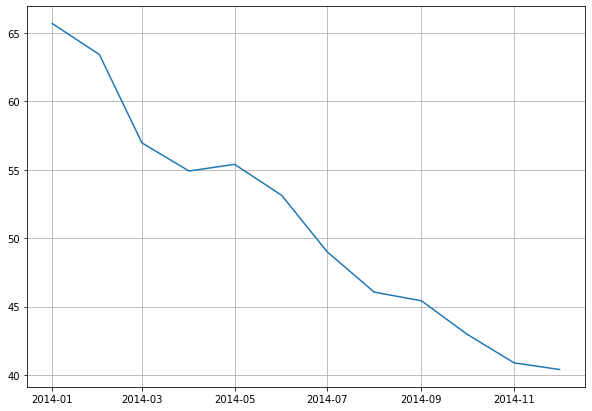

In [28]:
# Уменьшение разброса значений (дисперсии) у рабочих, использовавших первое поколение инструмента
plt.plot(uniques_0, stdevs_0)
plt.grid()
plt.show()

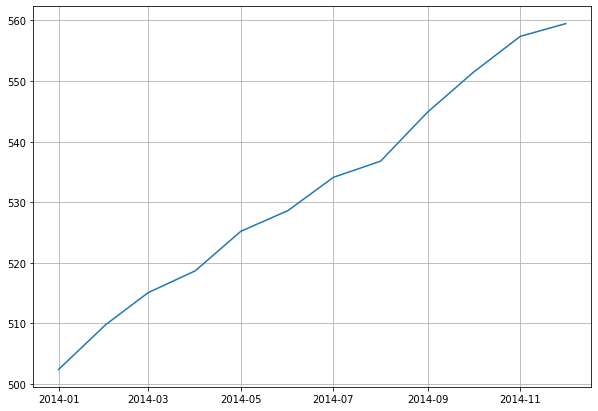

In [29]:
# Увеличение среденей выработки у рабочих, использовавших первое поколение инструмента
plt.plot(uniques_0, means_0)
plt.grid()
plt.show()

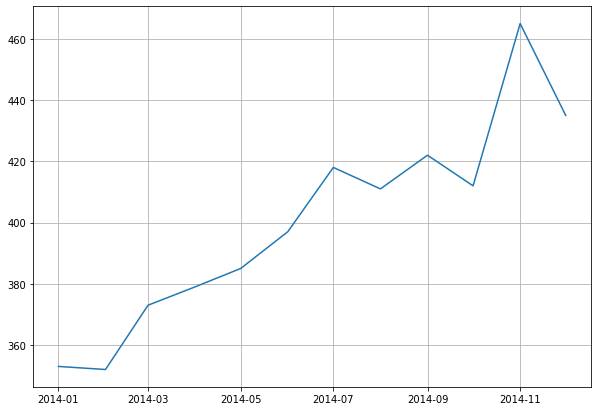

In [40]:
# Минимальные значения выработки рабочих, использовавших перрое поколение инструмента
plt.plot(uniques_0, mins_0)
plt.grid()
plt.show()

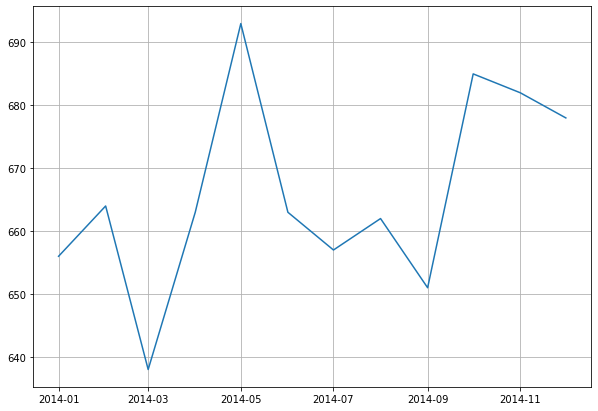

In [39]:
# Максимальные значения выработки рабочих, использовавших первоое поколение инструмента
plt.plot(uniques_0, maxes_0)
plt.grid()
plt.show()

In [32]:
uniques_1 = one_tool.hired_date.unique()
stdevs_1 = []
means_1 = []
mins_1 = []
maxes_1 = []
for _ in range(len(uniques_1)):
    std_1 = one_tool[one_tool.hired_date == uniques_1[_]].describe().reset_index().iloc[2][2]
    mn_1 = one_tool[one_tool.hired_date == uniques_1[_]].describe().reset_index().iloc[1][2]
    mi_1 = one_tool[one_tool.hired_date == uniques_1[_]].describe().reset_index().iloc[3][2]
    mx_1 = one_tool[one_tool.hired_date == uniques_1[_]].describe().reset_index().iloc[7][2]
    stdevs_1.append(std_1)
    means_1.append(mn_1)
    mins_1.append(mi_1)
    maxes_1.append(mx_1)
    

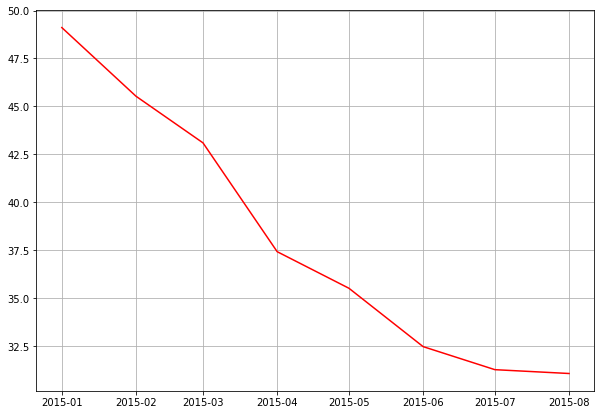

In [33]:
# Уменьшения разброса значений (дисперсии) у рабочих, использовавших второе поколение инструмента
plt.plot(uniques_1, stdevs_1, 'r')
plt.grid()
plt.show()

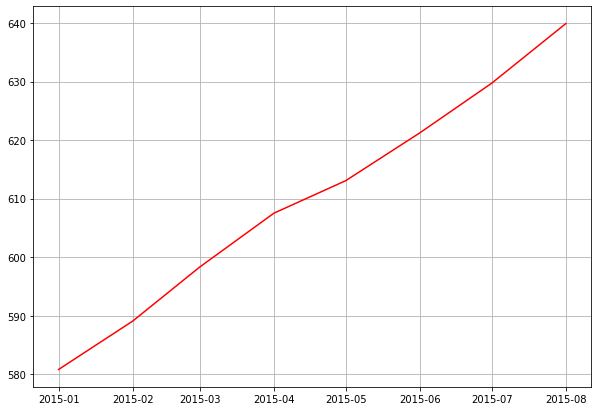

In [34]:
# Увеличение среденей выработки у рабочих, использовавших второое поколение инструмента
plt.plot(uniques_1, means_1, 'r')
plt.grid()
plt.show()

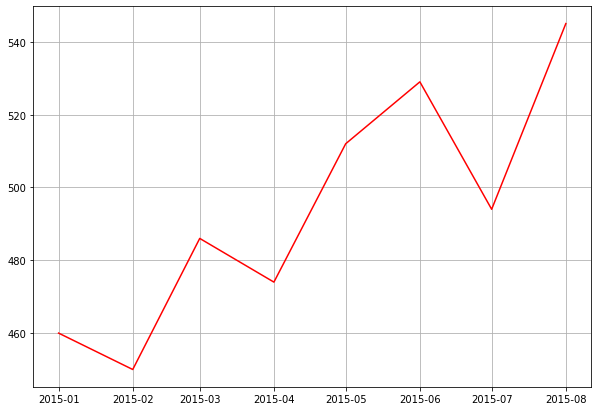

In [41]:
# Минимальные значения выработки рабочих, использовавших второе поколение инструмента
plt.plot(uniques_1, mins_1, 'r')
plt.grid()
plt.show()

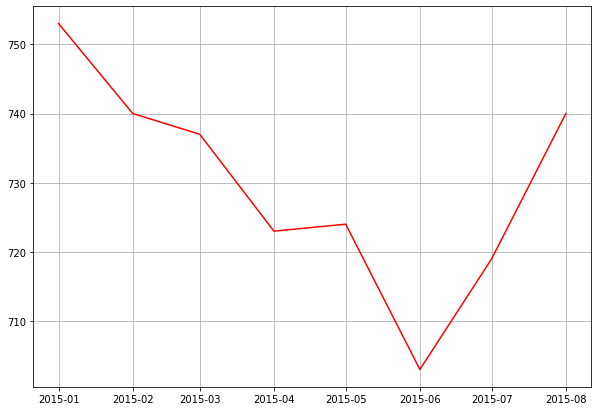

In [38]:
# Максимальные значения выработки рабочих, использовавших второе поколение инструмента
plt.plot(uniques_1, maxes_1, 'r')
plt.grid()
plt.show()

In [62]:
stat_values = pd.DataFrame(columns=['tool_gen', 'stdev', 'mean', 'max', 'min'])
another_table = pd.DataFrame(columns=['tool_gen', 'stdev', 'mean', 'max', 'min'])

In [63]:
stat_values['stdev'] = stdevs_0
stat_values['tool_gen'] = np.zeros(len(stdevs_0))
stat_values['mean'] = means_0
stat_values['max'] = maxes_0
stat_values['min'] = mins_0
stat_values.index = uniques_0

another_table['stdev'] = stdevs_1
another_table['tool_gen'] = np.ones(len(stdevs_1))
another_table['mean'] = means_1
another_table['max'] = maxes_1
another_table['min'] = mins_1
another_table.index = uniques_1

In [67]:
stat_values = pd.concat([stat_values, another_table])
stat_values = stat_values.astype(int)
stat_values

,tool_gen,stdev,mean,max,min
2014-01-01,0,65,502,656,353
2014-02-01,0,63,509,664,352
2014-03-01,0,56,515,638,373
2014-04-01,0,54,518,663,379
2014-05-01,0,55,525,693,385
2014-06-01,0,53,528,663,397
2014-07-01,0,49,534,657,418
2014-08-01,0,46,536,662,411
2014-09-01,0,45,544,651,422
2014-10-01,0,42,551,685,412


In [68]:
stat_values.to_csv('dwarfes_stats.csv')